# Blood Donor classification

Dataset source - [UCI ML](https://archive.ics.uci.edu/ml/datasets/HCV+data)

The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.

## Import libraries

In [1]:
! pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached scikit_learn-1.1.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
  Using cached scipy-1.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.4 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Using cached numpy-1.23.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pythonwhat 2.23.1 requires asttokens~=1.1.10, but you have asttokens 2.0.8 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.5.1 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.1.2 which is incompatible.


In [2]:
! pip install catboost

  Using cached catboost-1.0.6-cp38-none-manylinux1_x86_64.whl (76.6 MB)
  Using cached matplotlib-3.5.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached numpy-1.23.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached scipy-1.9.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.4 MB)
  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached pandas-1.4.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.37.1-py3-none-any.whl

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder, 
                                   StandardScaler)
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV)
from sklearn.metrics import (classification_report, 
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             roc_auc_score, 
                             roc_curve, 
                             auc)
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from math import ceil

## Read Data
Нужные нам данные содержатся в secondary_data.csv

In [4]:
df = pd.read_csv('data/hcvdat0.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Описание всех данных
All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.
1) X (Patient ID/No.)
2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3) Age (in years)
4) Sex (f,m)
5) ALB
6) ALP
7) ALT
8) AST
9) BIL
10) CHE
11) CHOL
12) CREA
13) GGT
14) PROT

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


## Data Cleaning

Удалим первую колонку с идентификатором пациента.

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Преобразуем категориальные фичи в категории

In [7]:
df[['Category', 'Sex']] = df[['Category', 'Sex']].astype('category')

Приведем имена колонок в нижний регистр

In [8]:
df.set_axis(df.columns.str.lower(), axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   category  615 non-null    category
 1   age       615 non-null    int64   
 2   sex       615 non-null    category
 3   alb       614 non-null    float64 
 4   alp       597 non-null    float64 
 5   alt       614 non-null    float64 
 6   ast       615 non-null    float64 
 7   bil       615 non-null    float64 
 8   che       615 non-null    float64 
 9   chol      605 non-null    float64 
 10  crea      615 non-null    float64 
 11  ggt       615 non-null    float64 
 12  prot      614 non-null    float64 
dtypes: category(2), float64(10), int64(1)
memory usage: 54.5 KB


## EDA

In [10]:
df.category.value_counts(normalize=True)

0=Blood Donor             0.866667
3=Cirrhosis               0.048780
1=Hepatitis               0.039024
2=Fibrosis                0.034146
0s=suspect Blood Donor    0.011382
Name: category, dtype: float64

В датасете есть дизбаланс классов. Для упрощения задачи и уменьшения дисбаланса преобразуем данные в две категории: Донор(0)/Не донор (1):
- 0: 0=Blood Donor 
- 1: 0s=suspect Blood Donor, 1=Hepatitis, 2=Fibrosis, 3=Cirrhosis

In [11]:
cat_map = {
    '0=Blood Donor': 'donor',
    '0s=suspect Blood Donor': 'donor',
    '1=Hepatitis': 'not donor',
    '2=Fibrosis': 'not donor',
    '3=Cirrhosis': 'not donor'
}
df['donor'] = df.category.map(cat_map).astype('category')
df.donor.value_counts(normalize=True)

donor        0.878049
not donor    0.121951
Name: donor, dtype: float64

Посмотрим на распределение числовых переменных.

In [12]:
df_long = df.melt(id_vars=['category', 'donor', 'sex'])
df_long.head()

,category,donor,sex,variable,value
0,0=Blood Donor,donor,m,age,32.0
1,0=Blood Donor,donor,m,age,32.0
2,0=Blood Donor,donor,m,age,32.0
3,0=Blood Donor,donor,m,age,32.0
4,0=Blood Donor,donor,m,age,32.0


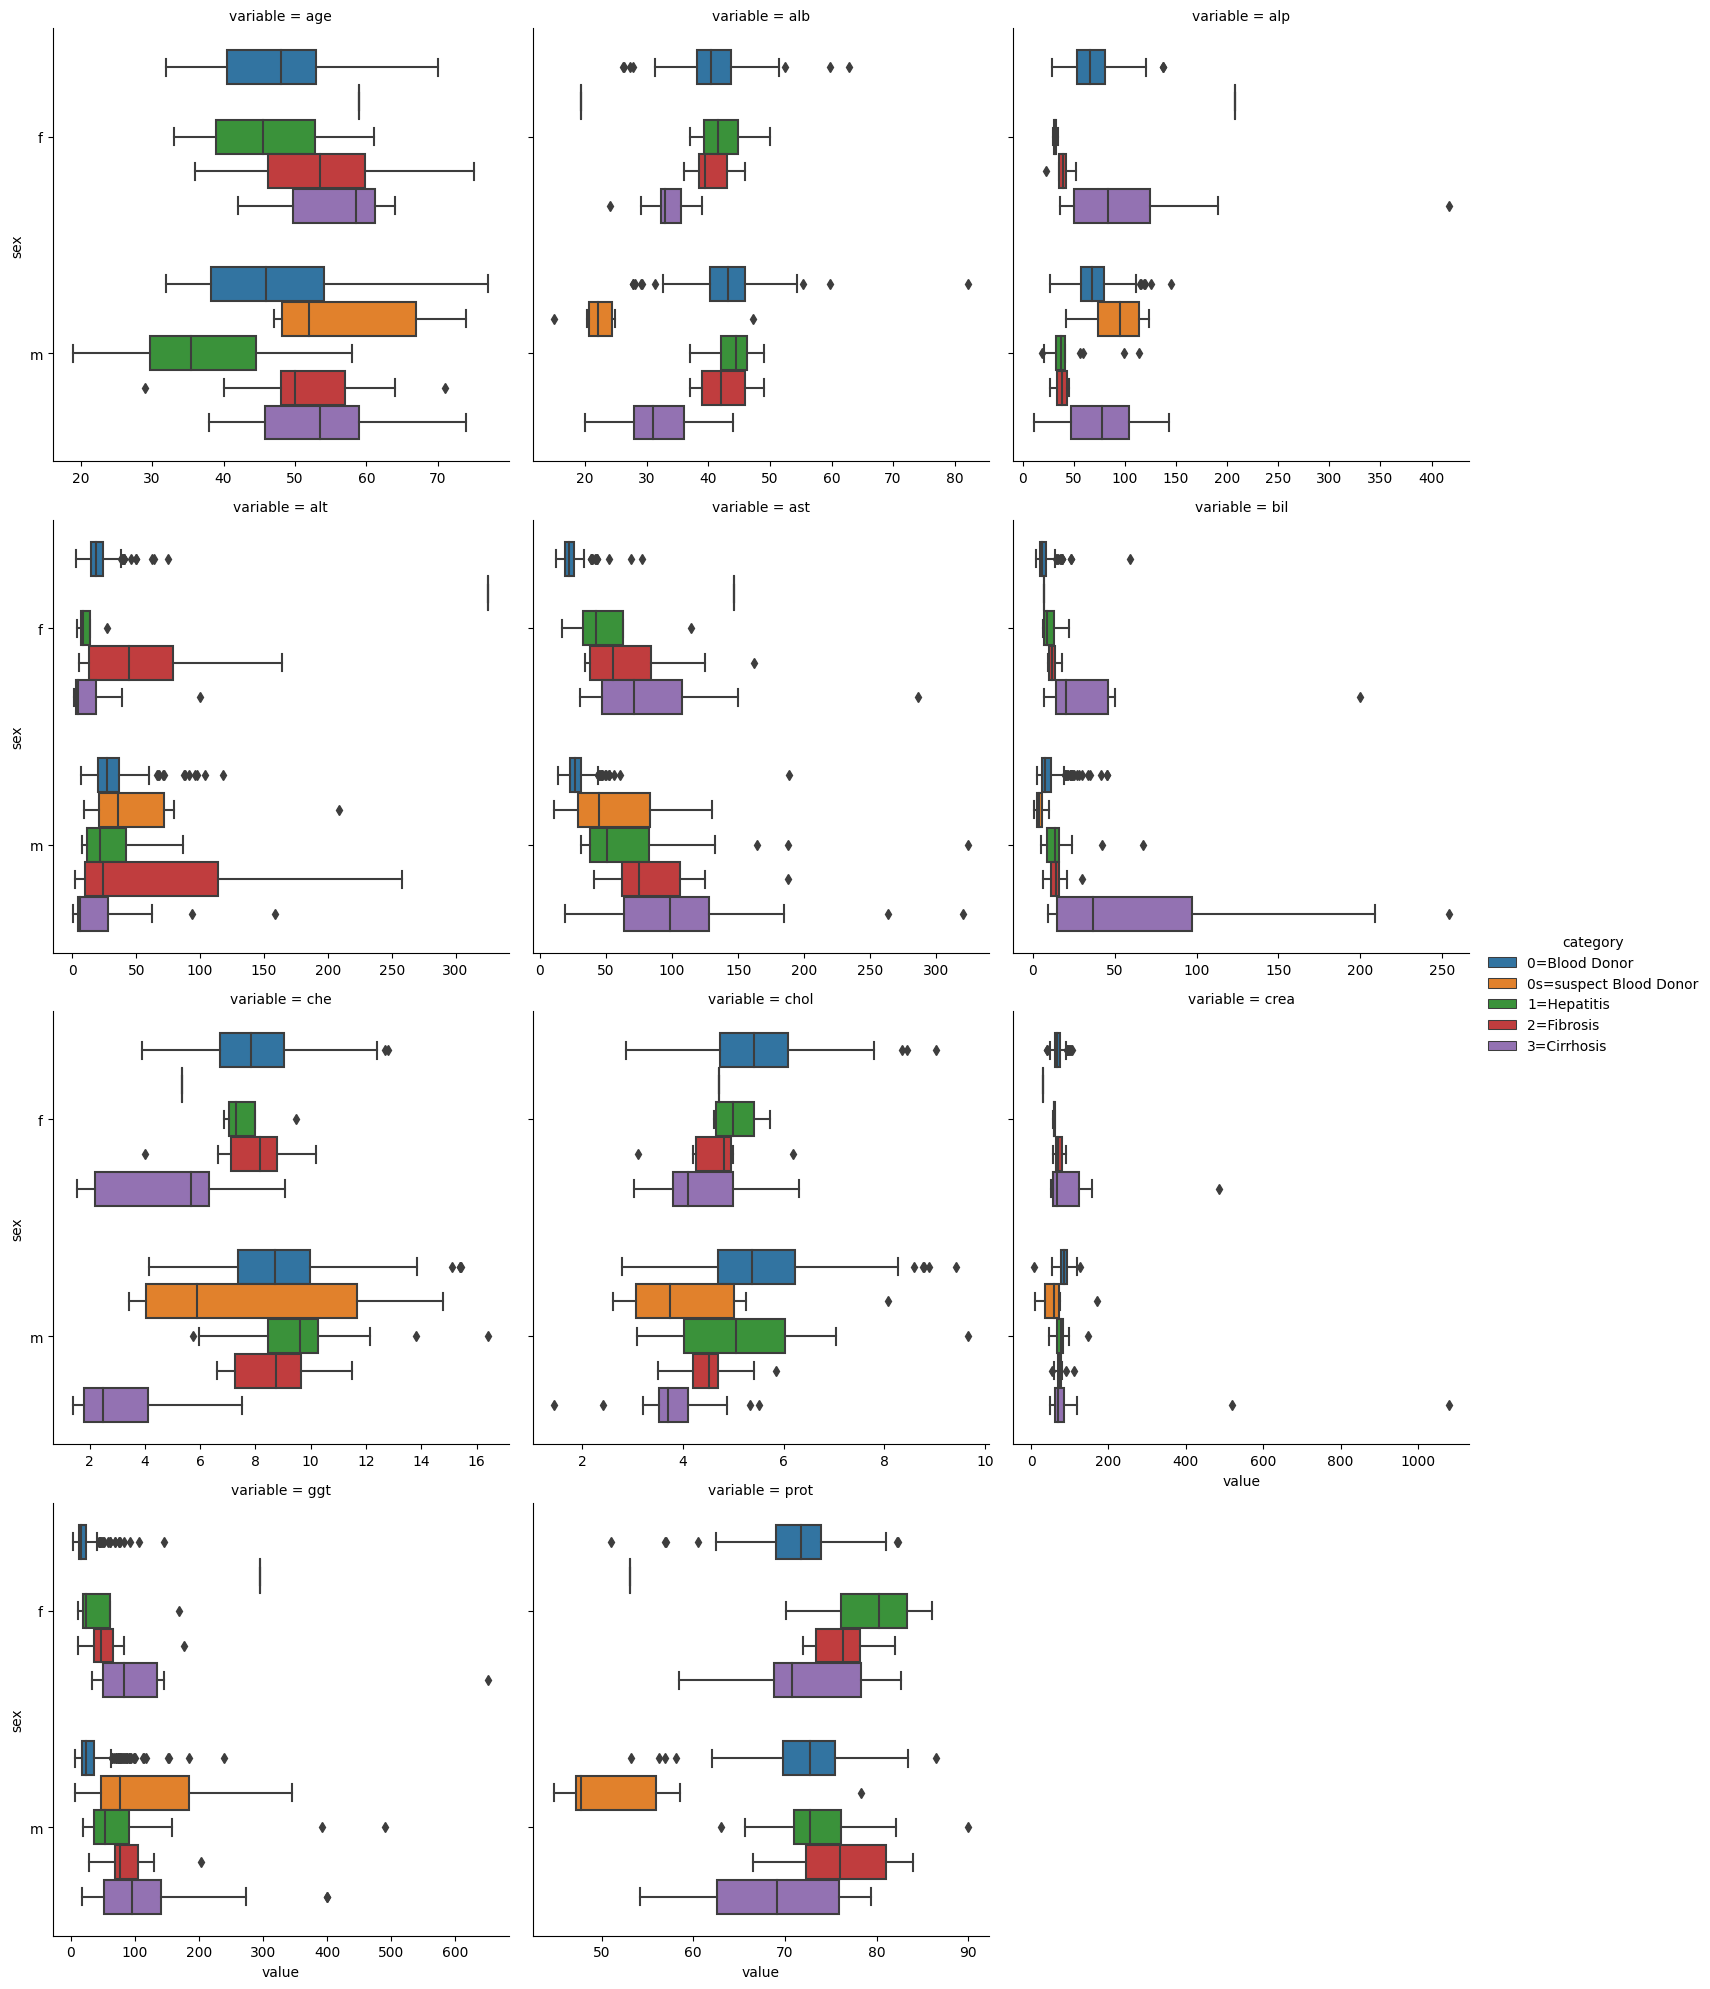

In [13]:
sns.catplot(data=df_long, kind='box', 
            y='sex', x='value', 
            hue='category', 
            col='variable', col_wrap=3,
            sharex=False)
plt.show()

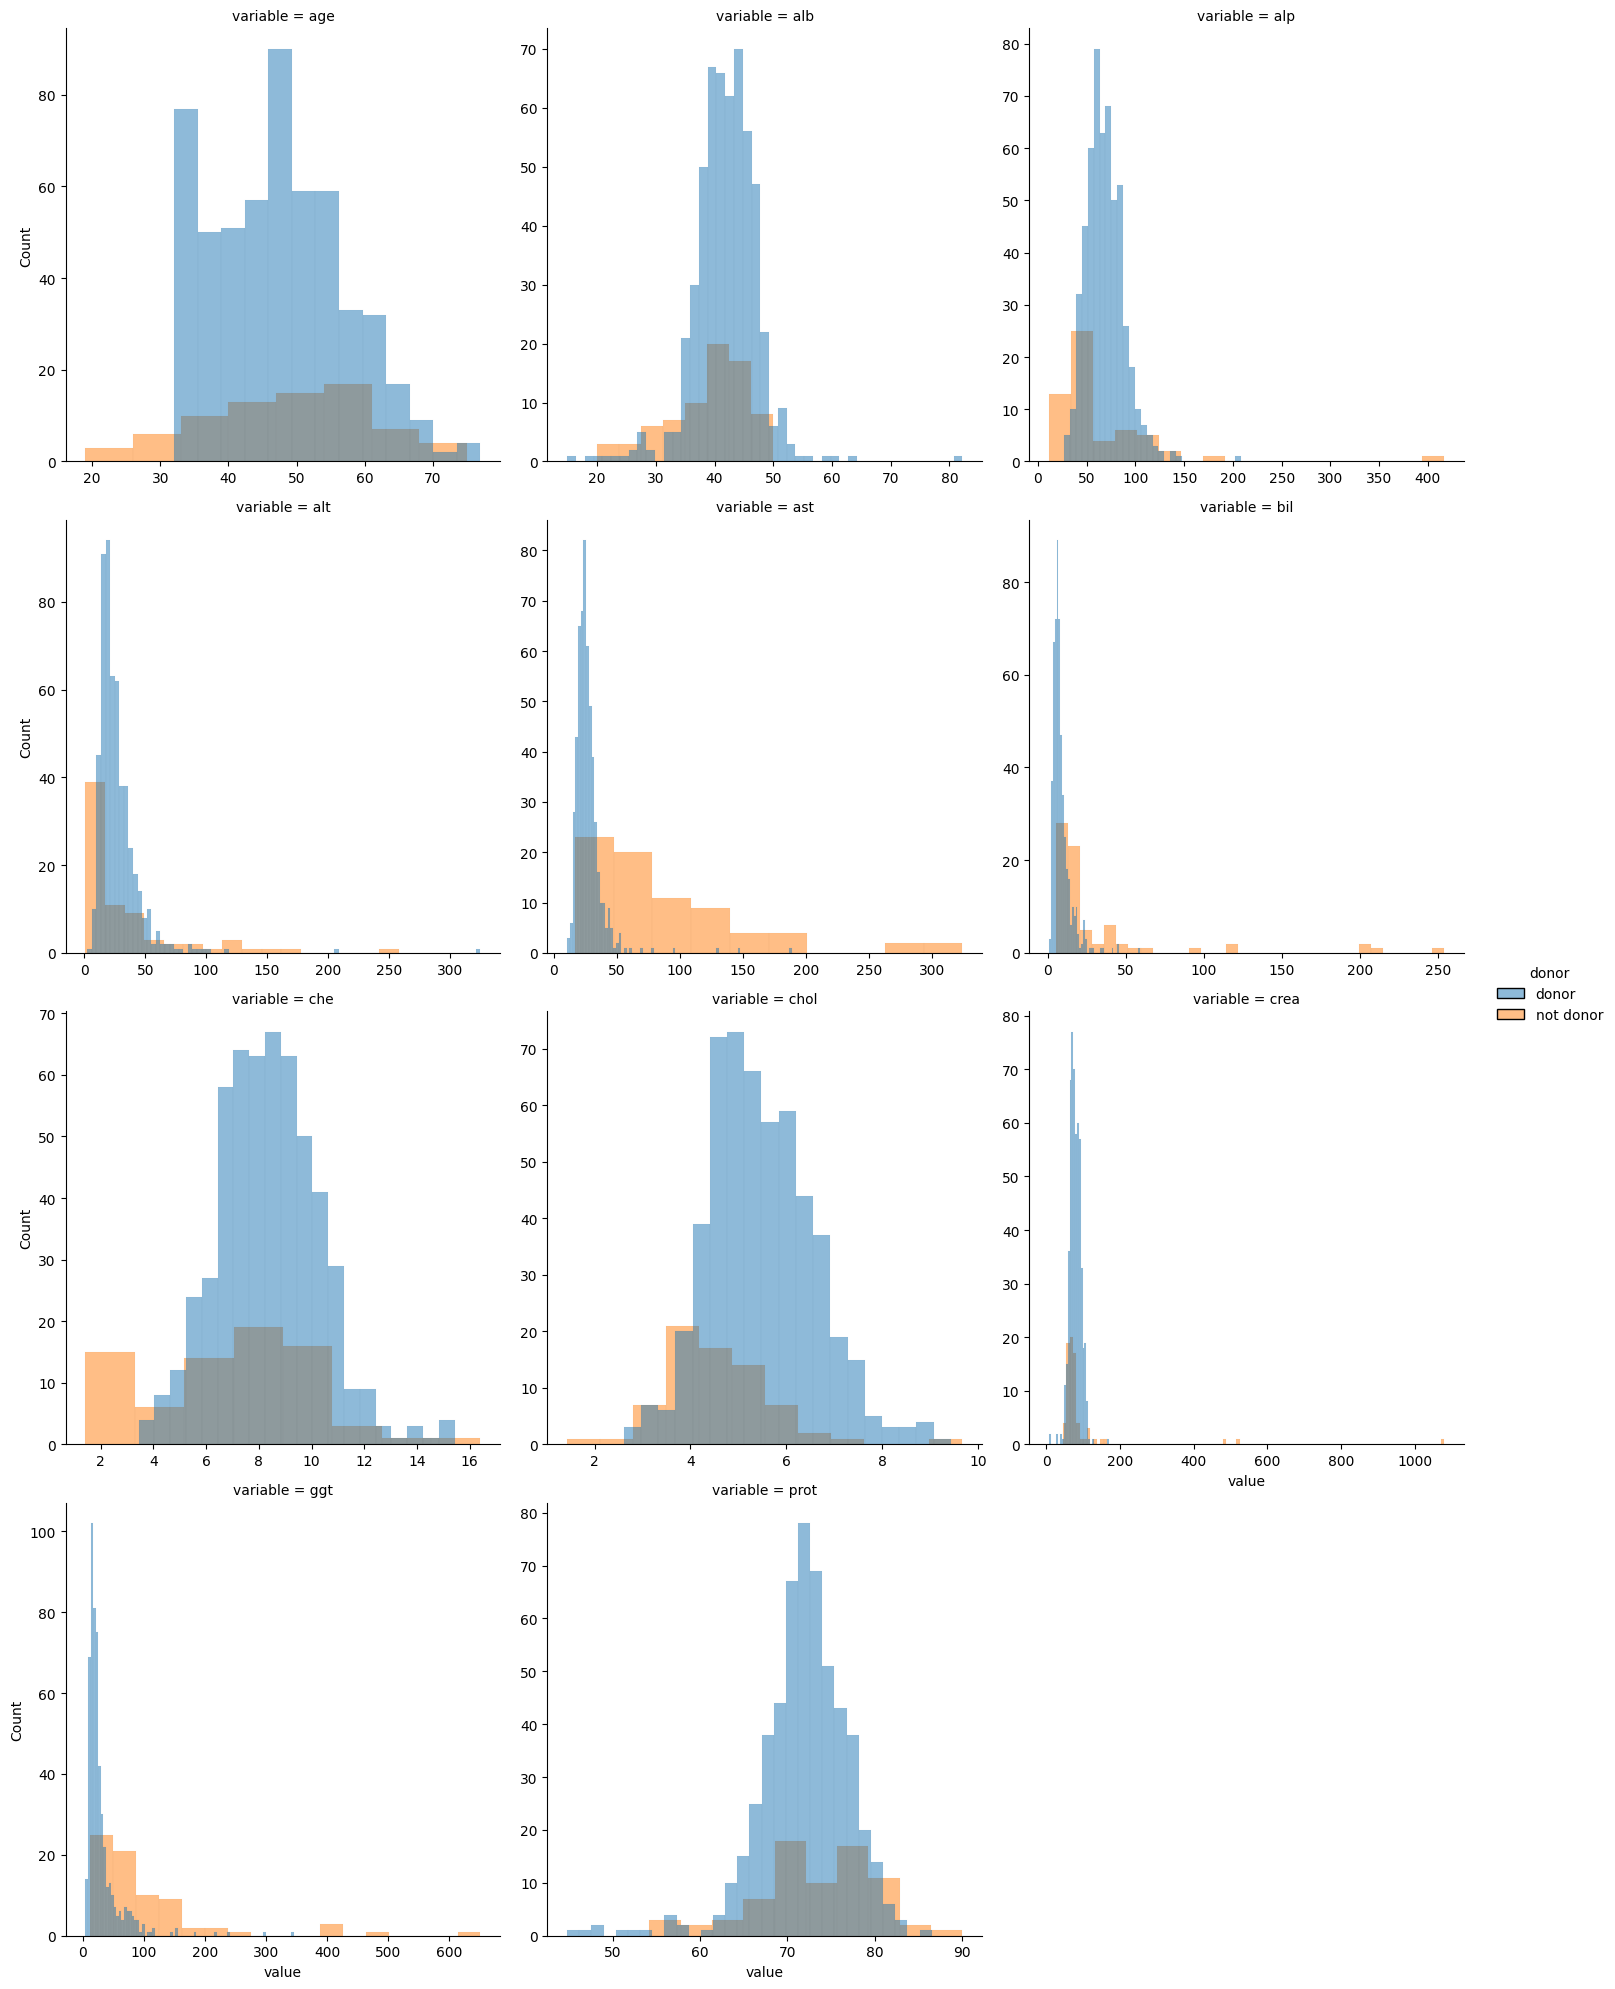

In [14]:
sns.displot(data=df_long, kind='hist', 
            hue='donor', x='value', 
            col='variable', col_wrap=3, 
            alpha=0.5, common_bins=False,
            facet_kws={'sharey':False, 'sharex': False})
plt.show()

### Missing data

In [15]:
df.isna().sum()

category     0
age          0
sex          0
alb          1
alp         18
alt          1
ast          0
bil          0
che          0
chol        10
crea         0
ggt          0
prot         1
donor        0
dtype: int64

Наш датасет небольшой, поэтому мы не можем себе позволить выкинуть строки с отсутсвующими данными. Поэтому мы заменим отсутсвующие данные с помощью KNNImputer.

In [16]:
# Select numeric columns
df_num = df.select_dtypes(include=['int', 'float'])
# Select categorical columns
df_cat = df.select_dtypes(include=['category'])
# Scale numeric variables
scaler = StandardScaler()
X_num = scaler.fit_transform(df_num)
# Encode categorical variables
enc = OneHotEncoder()
X_cat = enc.fit_transform(df_cat).toarray()
X = np.concatenate((X_num, X_cat), axis=1)
# Impute missing values
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(X)
# Reconstruct dataset
df_num = pd.DataFrame(scaler.inverse_transform(imputed[:, :X_num.shape[1]]), 
                      columns=df_num.columns)
df_imp = pd.concat([df_cat, df_num], axis=1)
# Check for missing values
df_imp.isna().sum()

category    0
sex         0
donor       0
age         0
alb         0
alp         0
alt         0
ast         0
bil         0
che         0
chol        0
crea        0
ggt         0
prot        0
dtype: int64

## Pre-processing
### Categorical feature encoding
Закодируем категориальные фичи

In [17]:
#enc = OneHotEncoder()
enc = OrdinalEncoder()
df_imp['sex'] = enc.fit_transform(df_imp['sex'].to_numpy().reshape(-1, 1))
X = df_imp.drop(['donor', 'category'], axis=1)

Закодируем целевую переменную
- 1 - donor
- 0 - not donor

In [18]:
y = df_imp['donor'].map({'not donor': 0, 'donor': 1})

###  Train-Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=7)

## Modeling

In [20]:
def draw_roc_auc(fpr, tpr, auc, ax, description='ROC curve', rl=True):
    ax.plot([0, 1], [0, 1], linestyle='--', color='black')
    ax.plot(fpr, tpr, label=f'{description} (auc = {auc})')
    ax.set(
        xlabel = 'False Positive Rate',
        ylabel = 'True Positive Rate'
    )
    ax.legend(loc='lower right')
    
def clf_predict(model, description, X_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    return dict(
        alg = description,
        y_pred = y_pred, 
        y_pred_proba = y_pred_proba
    )
def do_roc_auc(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    return (fpr, tpr, auc_score)
    
def clf_rate(model, description, X_test, y_test):
    pred = clf_predict(model, description, X_test)
    print(classification_report(y_test, pred['y_pred']))
    fpr, tpr, auc_score = do_roc_auc(y_test, pred['y_pred_proba'][:,1])
    fig, ax = plt.subplots()
    fig.set_size_inches(6,6)
    draw_roc_auc(fpr, tpr, round(auc_score, 3), ax)
    plt.show()
    return pred
    

In [21]:
sns.set_theme()

### Default

#### sklearn

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.98      1.00      0.99       162

    accuracy                           0.98       185
   macro avg       0.99      0.91      0.95       185
weighted avg       0.98      0.98      0.98       185



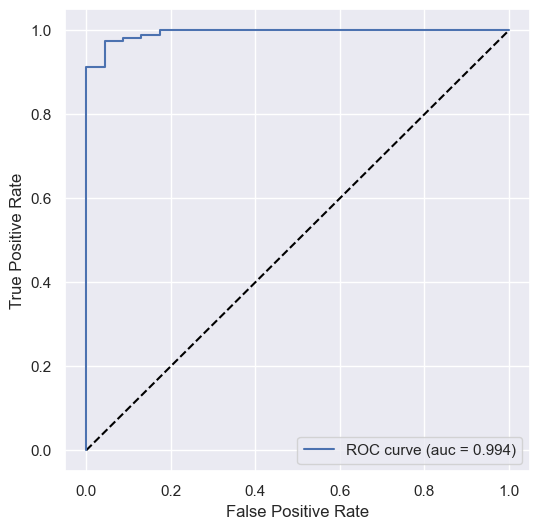

In [22]:
sk_gb = GradientBoostingClassifier().fit(X_train, y_train)
sk = clf_rate(sk_gb, 'sklearn', X_test, y_test)

#### XGBoost

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.99      0.99      0.99       162

    accuracy                           0.98       185
   macro avg       0.97      0.95      0.96       185
weighted avg       0.98      0.98      0.98       185



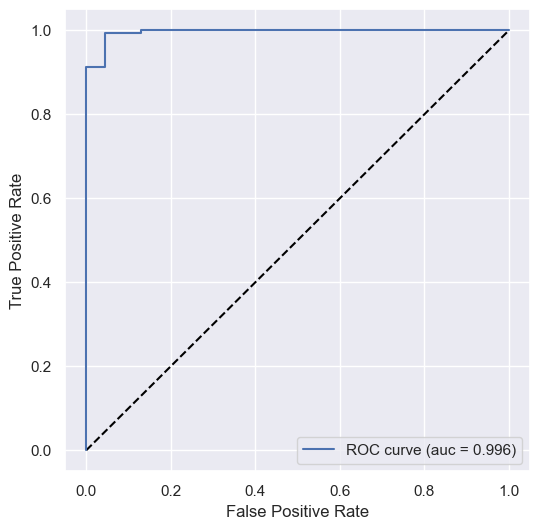

In [23]:
xgbc = XGBClassifier().fit(X_train, y_train)
xgb = clf_rate(xgbc, 'XGBoost', X_test, y_test)

#### CatBoost

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.98      1.00      0.99       162

    accuracy                           0.98       185
   macro avg       0.99      0.91      0.95       185
weighted avg       0.98      0.98      0.98       185



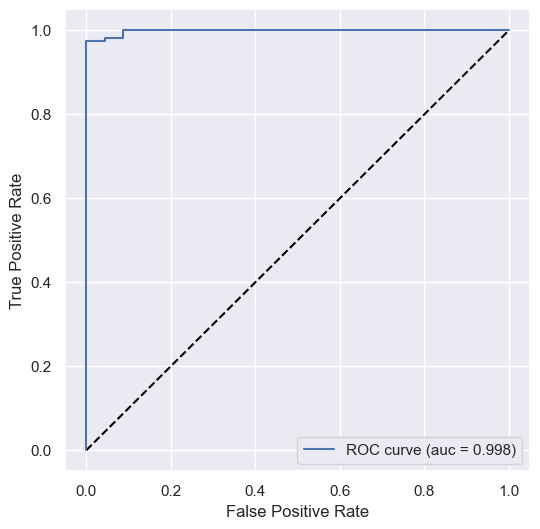

In [24]:
cbc = CatBoostClassifier(logging_level='Silent').fit(X_train, y_train)
cb = clf_rate(cbc, 'CatBoost', X_test, y_test)

#### LightGBM

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.98      1.00      0.99       162

    accuracy                           0.98       185
   macro avg       0.99      0.91      0.95       185
weighted avg       0.98      0.98      0.98       185



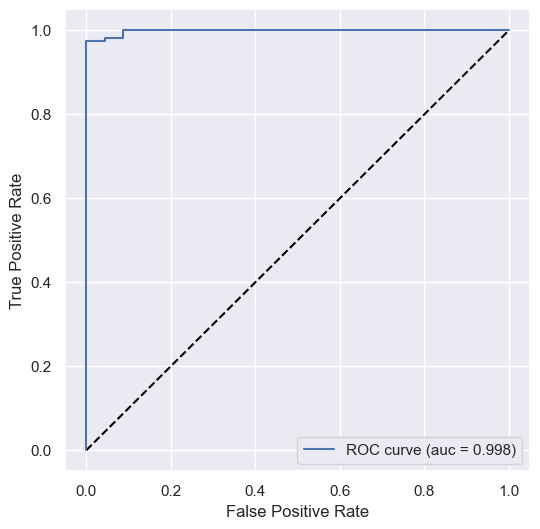

In [25]:
lgbmc = CatBoostClassifier(logging_level='Silent').fit(X_train, y_train)
lgbm = clf_rate(lgbmc, 'LightGBM', X_test, y_test)

#### Comparison

In [26]:
def calc_metrics(description, test, pred):
    return dict(
        description=description,
        accuracy=accuracy_score(test, pred),
        precision=precision_score(test, pred),
        recall=recall_score(y_test, pred),
        f1_score=f1_score(test, pred)
    )

,description,accuracy,precision,recall,f1_score
1,XGBoost,0.983784,0.987730,0.993827,0.990769
0,sklearn,0.978378,0.975904,1.000000,0.987805
2,CatBoost,0.978378,0.975904,1.000000,0.987805
3,LightGBM,0.978378,0.975904,1.000000,0.987805


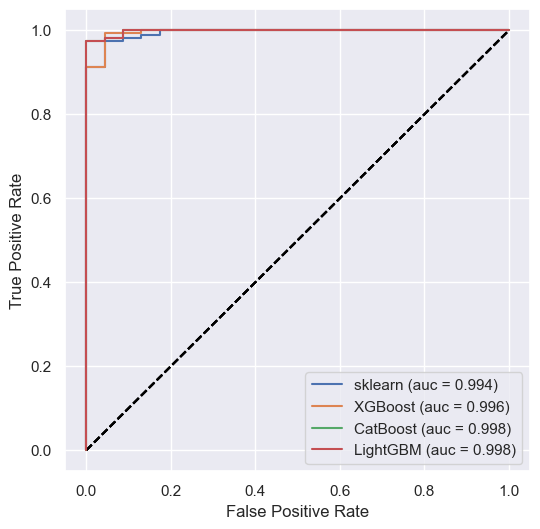

In [27]:
preds = [sk, xgb, cb, lgbm]
scores = []
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
for pred in preds:
    score = calc_metrics(pred['alg'], y_test, pred['y_pred'])
    scores.append(score)
    tpr, fpr, auc1 = do_roc_auc(y_test, pred['y_pred_proba'][:, 1])
    draw_roc_auc(tpr, fpr, round(auc1,3), ax, description=pred['alg'])
scores = pd.DataFrame(scores)
display(scores.sort_values('precision', ascending=False))
plt.show()

Все алгоритмы показали хорошую работу "из коробки", sklearn показал себя хуже всех. CatBoost и LightGBM в лидерах.

### Cross Validation
Нам важно, чтобы процент доноров в пуле идентифицированных алгоритмом как донор был максимален. Поэтому при подборе гиперпараметров будем использовать precision метрику.

#### sklearn

In [28]:
# set parameters to select
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [1, 2, 3],
    'subsample': [0.3, 0.5, 0.7, 1]
}
# set seed
np.random.seed(7)
# search for optimal parameters
grid_search = GridSearchCV(sk_gb, param_grid, scoring='precision', verbose=1).fit(X_train, y_train)
# save best estimator
sk_gb2 = grid_search.best_estimator_
# show selected parameters
print(f'Best Score: {grid_search.best_score_}\n', 
      f'Best Estimator:n_estimators={sk_gb2.n_estimators}, max_depth={sk_gb2.max_depth}, subsample={sk_gb2.subsample}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Score: 0.9825877825877825
 Best Estimator:n_estimators=500, max_depth=2, subsample=0.5


              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.98      1.00      0.99       162

    accuracy                           0.98       185
   macro avg       0.99      0.91      0.95       185
weighted avg       0.98      0.98      0.98       185



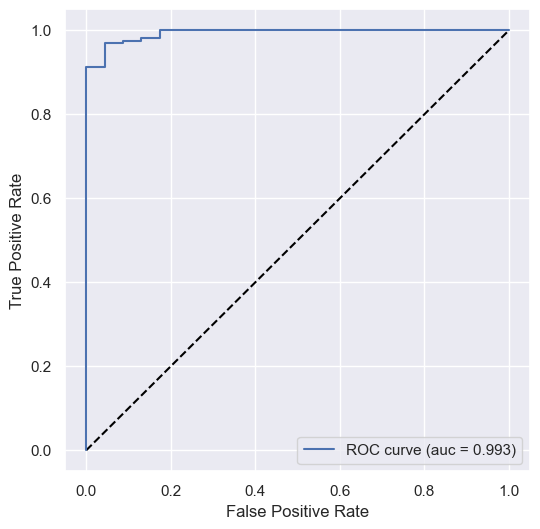

In [29]:
sk2 = clf_rate(sk_gb2, 'sklearn cv', X_test, y_test)

#### XGBoost

In [38]:
# set parameters to select
param_grid = {
    'n_estimators': [100, 300, 500],
    'subsample': [0.3, 0.5, 0.7, 1],
    'max_depth': [1, 3, 6]
}
# set seed
np.random.seed(7)
# search for optimal parameters
grid_search = GridSearchCV(xgbc, param_grid, scoring='precision', verbose=1).fit(X_train, y_train)
# save best estimator
xgbc2 = grid_search.best_estimator_
# show selected parameters
print(f'Best Score: {grid_search.best_score_}\n', 
      f'Best Estimator:n_estimators={xgbc2.n_estimators}, max_depth={xgbc2.max_depth}, subsample={xgbc2.subsample}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Score: 0.9846786125267137
 Best Estimator:n_estimators=300, max_depth=1, subsample=1


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.99      0.99      0.99       162

    accuracy                           0.99       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.99      0.99      0.99       185



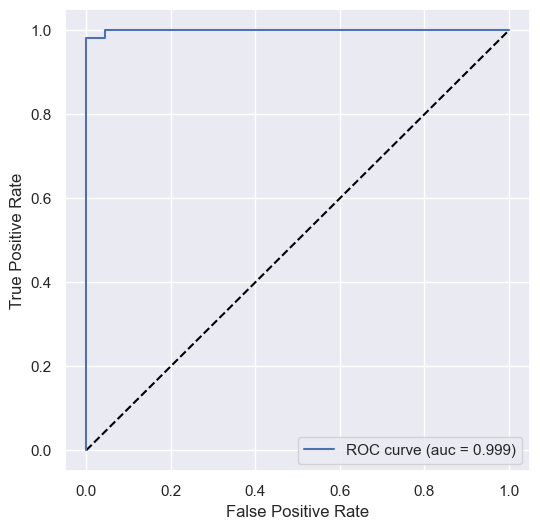

In [39]:
xgb2 = clf_rate(xgbc2, 'XGBoost CV', X_test, y_test)

#### CatBoost

In [40]:
# set parameters to select
param_grid = {
    'n_estimators': [100, 300, 500],
    'subsample': [0.3, 0.5, 1],
    'max_depth': [1, 3, 6]
}
# set seed
np.random.seed(7)
# search for optimal parameters
grid_search = GridSearchCV(cbc, param_grid, scoring='precision', verbose=1).fit(X_train, y_train)
# save best estimator
cbc2 = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.98      1.00      0.99       162

    accuracy                           0.98       185
   macro avg       0.99      0.91      0.95       185
weighted avg       0.98      0.98      0.98       185



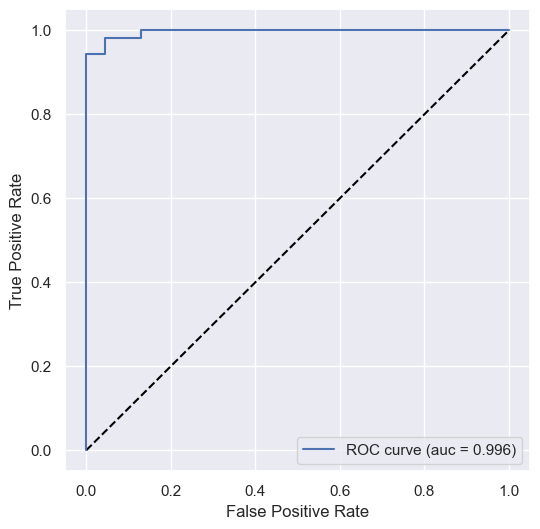

In [41]:
cb2 = clf_rate(cbc2, 'CatBoost CV', X_test, y_test)

#### LightGBM

In [42]:
# set parameters to select
param_grid = {
    'n_estimators': [100, 300, 500],
    'subsample': [0.3, 0.5, 1],
    'max_depth': [1, 3, 6]
}
# set seed
np.random.seed(7)
# search for optimal parameters
grid_search = GridSearchCV(lgbmc, param_grid, scoring='precision', verbose=1).fit(X_train, y_train)
# save best estimator
lgbmc2 = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.98      1.00      0.99       162

    accuracy                           0.98       185
   macro avg       0.99      0.91      0.95       185
weighted avg       0.98      0.98      0.98       185



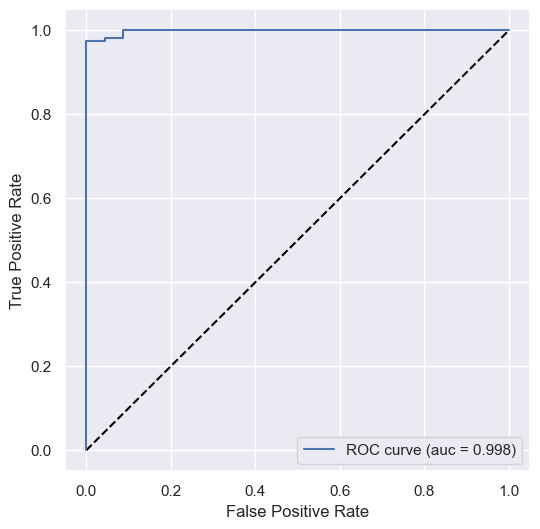

In [43]:
lgbm2 = clf_rate(lgbmc, 'LightGBM CV', X_test, y_test)

#### Comparison

,description,accuracy,precision,recall,f1_score,description,accuracy,precision,recall,f1_score
1,XGBoost,0.983784,0.987730,0.993827,0.990769,XGBoost CV,0.989189,0.993827,0.993827,0.993827
0,sklearn,0.978378,0.975904,1.000000,0.987805,sklearn cv,0.978378,0.975904,1.000000,0.987805
2,CatBoost,0.978378,0.975904,1.000000,0.987805,CatBoost CV,0.978378,0.975904,1.000000,0.987805
3,LightGBM,0.978378,0.975904,1.000000,0.987805,LightGBM CV,0.978378,0.975904,1.000000,0.987805


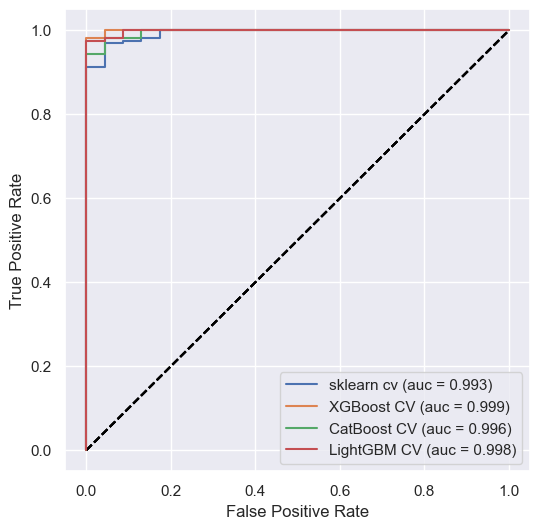

In [44]:
preds2 = [sk2, xgb2, cb2, lgbm2]
scores2 = []
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
for pred in preds2:
    score = calc_metrics(pred['alg'], y_test, pred['y_pred'])
    scores2.append(score)
    tpr, fpr, auc1 = do_roc_auc(y_test, pred['y_pred_proba'][:, 1])
    draw_roc_auc(tpr, fpr, round(auc1,3), ax, description=pred['alg'])
scores2 = pd.DataFrame(scores2)
display(pd.concat([scores.sort_values('precision', ascending=False), 
                   scores2.sort_values('precision', ascending=False)], axis=1))
plt.show()

Лучше всего себя показал XGBoost.